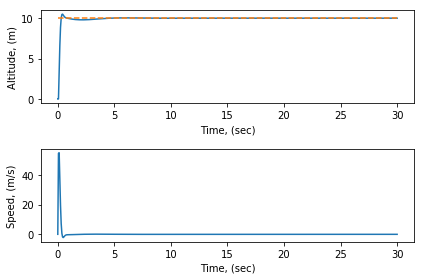

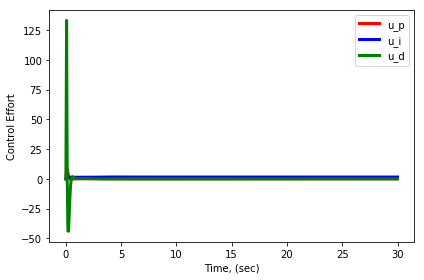

The rise time is 0.301 seconds
The percent overshoot is 5.0%
The steady state offset at 30 seconds is 0.000 meters


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pid_controller import PIDController
from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set kp, ki and kd so that you have a steady state 
# error offset less than 0.029 m and your percent overshoot is less than 4.0 %.
# Its encouraged to try for less though!!
kp = 0.8
ki = 0.7
kd = 0.8
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simultion points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of PID_Controller class
pid = PIDController()

# Set the Kp value of the controller
pid.setKP(kp)

# Set the Ki value of the controller
pid.setKI(ki)

# Set the Kd value of the controller
pid.setKD(kd)

# Set altitude target
r = 10 # meters
pid.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,pid)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, pid.u_p, label='u_p', linewidth=3, color = 'red')
ax3.plot(time, pid.u_i, label='u_i', linewidth=3, color = 'blue')
ax3.plot(time, pid.u_d, label='u_d', linewidth=3, color = 'green')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))